# Pipeline de Processamento e Base de dados


## Descrição do problema a ser resolvido




O problema a ser resolvido se trata da automatização do SAC (Serviço de atendimento ao cliente) de remessas financeiras, visto que muitos clientes da empresa parceira Brastel trabalham no Japão e fazem transações bancárias para familiares que estão nos seus países de origem.
Entretanto, a empresa possui o desafio de atender em média 25 mil clientes mensais e portanto o atendimento humano se torna muitas vezes ineficiente e não consegue suprir todas estas demandas de maneira rápida e eficiente, prejudicando a satisfação do cliente com o serviço prestado.

Essa ineficiência do atendimento das altas requisições dos clientes pode ser resumida principalmente no fator de disponibilidade do serviços do SAC, já que além da quantidade das demandas excederem a capacidade humana, não há a possibilidade do atendimento ser prestado 24 horas por dia e 7 dias na semana.

Obs: Toda esta descrição do problema a ser resolvido está no Tapi do projeto e também foram abordadas no Workshop com o parceiro ocorrido em 07/08/2024.

## Conexão ao Google Drive e instalação de bibliotecas

In [210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
!pip install pyspellchecker

In [212]:
!pip install word2number

In [213]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [214]:
!apt-get install -y hunspell  libhunspell-dev
!pip install hunspell

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libhunspell-dev is already the newest version (1.7.0-4build1).
hunspell is already the newest version (1.7.0-4build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [215]:
!wget https://cgit.freedesktop.org/libreoffice/dictionaries/plain/pt_BR/pt_BR.dic
!wget https://cgit.freedesktop.org/libreoffice/dictionaries/plain/pt_BR/pt_BR.aff

--2024-08-28 14:21:49--  https://cgit.freedesktop.org/libreoffice/dictionaries/plain/pt_BR/pt_BR.dic
Resolving cgit.freedesktop.org (cgit.freedesktop.org)... 131.252.210.161, 2610:10:20:722::83fc:d2a1
Connecting to cgit.freedesktop.org (cgit.freedesktop.org)|131.252.210.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘pt_BR.dic.4’

pt_BR.dic.4             [     <=>            ]   4.27M  3.09MB/s    in 1.4s    

2024-08-28 14:21:51 (3.09 MB/s) - ‘pt_BR.dic.4’ saved [4477695]

--2024-08-28 14:21:51--  https://cgit.freedesktop.org/libreoffice/dictionaries/plain/pt_BR/pt_BR.aff
Resolving cgit.freedesktop.org (cgit.freedesktop.org)... 131.252.210.161, 2610:10:20:722::83fc:d2a1
Connecting to cgit.freedesktop.org (cgit.freedesktop.org)|131.252.210.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘pt_BR.aff.4’

pt_BR.aff.4             [    <=>             ] 956.83K

## Importação da base de dados

Esta etapa consiste em importar a base de dados fornecida pelo parceiro Brastel, que contém as conversas relacionadas às remessas financeiras realizadas pelos clientes. A base de dados é composta por apenas 1 arquivo chamado "Exemplos de chats com clientes_grupo05 - Exemplos de chats com clientes.csv".

Esta mesma base de dados está disponível no drive compartilhado "Shareddrives" de cada integrante do grupo com o nome "Grupo 05".

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import nltk
from nltk.corpus import stopwords
import spacy
from word2number import w2n
import hunspell

In [217]:
nltk.download('floresta')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stop_words_en')
nltk.download('wordnet')
nltk.download('rslp')

[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading stop_words_en: Package 'stop_words_en' not
[nltk_data]     found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [218]:
stop_words = set(stopwords.words('portuguese'))
stop_words_en = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [219]:
df = pd.read_csv('/content/drive/Shareddrives/Grupo_05/Exemplos de chats com clientes_grupo05 - Exemplos de chats com clientes.csv')
df

,No,Intencao,Pergunta,Resposta\n
0,1,Como depositar,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"Bom dia! Sim, o sr pode utilizar o cartão de d..."
1,2,Como fazer remessa,Como enviar dinheiro do Japão?,"Para se inscrever no serviço de remessa, por f..."
2,3,Tempo de remessa,Quanto tempo levará para o beneficiário recebe...,"Via de regra, as remessas serão pagas via PIX ..."
3,4,"Pedido de envio via metodo ""ByPhone""",Boa tarde\nAcabei de fazer a transferência de ...,iremos processar a sua solicitacao.\nMuito obr...
4,5,"Pedido de envio via metodo ""ByPhone""",Poderia fazer a remessa de 22yenes para o BBB ...,iremos processar a sua solicitacao.\nMuito obr...
...,...,...,...,...
500,501,Atualizacao de dados cadastrais,Boa tarde como faço para fazer a mudança de en...,A senhora pode trocar pelo próprio app da Bras...
501,502,Tempo de entrega do cartao,Bom dia\nConsegui fazer depósito sem o cartão ...,Boa noite\nO sr solicitou dia 28. Será entregu...
502,503,Cancelamento,"Boa noite,a beneficiária me avisou que a conta...","Sim, podemos cancelar\nO valor voltará no seu ..."
503,504,Reembolso,"Boa noite\nEu fiz um depósito errado, era pra ...",É possível solicitar o reembolso diretamente d...


## Perguntas a serem respondidas pela análise exploratória

Nesta etapa, analisando a base de dados do parceiro, fizemos perguntas que logo em seguida serão respondia pela análise exploratória. O intuito desta parte é facilitar, organizar e direcionar o processo da análise exploratória dos dados.

Aqui estão as perguntas a serem respondidas:

1. Quantas mensagens de pergunta/resposta possuem caracteres japoneses?
2. Quantas mensagens de pergunta/resposta possuem palavras japonesas?
3. Quantas categorias de intenção existem?
4. Qual é a intenção mais frequente?
5. Quais são as palavras mais usadas em perguntas, respostas e no total?
6. Quantas mensagens estão relacionadas a "depósito", "inscrição", "cartão",
 "remessa" e "app" ou "aplicativo"?
7. Quantas mensagens nos campos "Pergunta" e "Resposta" são duplicadas?
8. Quantas perguntas são feitas sobre sobre conversão e taxas?
9. Quantas mensagens mencionam "erro" ou "problema"?
10. Quantas mensagens estão relacionadas a "limites de valores que podem ser transferidos"?
11. Quantas mensagens mencionam "tempo do valor a ser creditado/chegar no beneficiário"?
12. Quantas mensagens incluem perguntas sobre "horário de funcionamento"?
13. Quantas mensagens são sobre "confirmação de pagamento"?
14. Quantas mensagens incluem links externos?
15. Quantas abreviações existem na base de dados?

## Análise exploratória dos dados sobre as perguntas feitas

### Respondendo as perguntas "Quantas mensagens de pergunta/resposta possuem caractéres japoneses?" e "Quantas mensagens de pergunta/resposta possuem palavras japonesas?"

Esta análise é importante para podermos eliminar as palvras escritas em japonês durante o pré-processamento. Note que existe apenas os 4 casos que aparecem em três mensagens diferentes:
- 三 - Três
- ゆうちょ銀行 - Banco Postal do Japão
- 二丁目 - 2 rua
- 番地 - Endereço da rua
- 号 - Emitir

In [220]:
# Função para extrair palavras japonesas de um texto
def extrair_palavras_japonesas(texto):
    # Verifica se o texto é uma string
    if isinstance(texto, str):
        # Regex para encontrar caracteres japoneses (Hiragana, Katakana, Kanji)
        palavras_japonesas = re.findall(r'[\u3040-\u30ff\u4e00-\u9faf]+', texto)
        return palavras_japonesas
    return []

In [221]:
# Aplicar a função em todas as linhas da coluna 'Pergunta' e 'Resposta'
df['Palavras_japonesas_pergunta'] = df['Pergunta'].apply(extrair_palavras_japonesas)
df['Palavras_japonesas_resposta'] = df['Resposta\n'].apply(extrair_palavras_japonesas)

# Filtrar as mensagens que possuem palavras japonesas em perguntas ou respostas
mensagens_japonesas = df[(df['Palavras_japonesas_pergunta'].str.len() > 0) | (df['Palavras_japonesas_resposta'].str.len() > 0)]

In [222]:
# Exibir as palavras japonesas encontradas em perguntas e respostas
print("Palavras japonesas encontradas nas mensagens:")
for idx, row in mensagens_japonesas.iterrows():
    print(f"Mensagem {idx + 1}:")
    print(f"  Pergunta: {row['Palavras_japonesas_pergunta']}")
    print(f"  Resposta: {row['Palavras_japonesas_resposta']}")

Palavras japonesas encontradas nas mensagens:
Mensagem 42:
  Pergunta: []
  Resposta: ['三', 'ゆうちょ銀行']
Mensagem 414:
  Pergunta: []
  Resposta: ['二丁目', '番地']
Mensagem 500:
  Pergunta: []
  Resposta: ['号']


### Respondendo as perguntas: "Quantas categorias de intenção existem?" e "Qual é a intenção mais frequente?".

Esta Feature 'Intencao' está relacionada ao direcionamento e qual será o conteúdo abordado nas conversas. Note que existe 18 tipos diferentes desta feature. Sendo que a mais frequente é  "Confirmacao de cambio/taxas".

In [223]:
intencoes_unicas = df['Intencao'].unique()
num_categorias_intencao = len(intencoes_unicas)

intencao_mais_frequente = df['Intencao'].value_counts().idxmax()
frequencia_intencao_mais_frequente = df['Intencao'].value_counts().max()

# Exibindo os resultados
print(f"Número de categorias de intenção: {num_categorias_intencao}")
print("Intenções únicas:")
for intencao in intencoes_unicas:
    print(f"- {intencao}")

print(f"\nA intenção mais frequente é: '{intencao_mais_frequente}' com {frequencia_intencao_mais_frequente} ocorrências.")

Número de categorias de intenção: 18
Intenções únicas:
- Como depositar
- Como fazer remessa
- Tempo de remessa
- Pedido de envio via metodo "ByPhone"
- Como se inscrever
- Confirmacao de cambio/taxas
- Envio via Deposit Code
- Registro/Atualizacao de Documento
- Solicitacao de cartao de remessas
- Cadastro de beneficiario
- Acesso a conta
- Termos e condicoes do servico
- Problemas de remessa
- Tempo de entrega do cartao
- Reembolso
- Regras do servico
- Atualizacao de dados cadastrais
- Cancelamento

A intenção mais frequente é: 'Confirmacao de cambio/taxas' com 120 ocorrências.


Esta etapa fornece o Top 5 das categorias da feature "Intencao" mais encontradas na base de dados.

<ipython-input-224-63745f09296e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_intencoes.values, y=top_5_intencoes.index, palette='viridis')


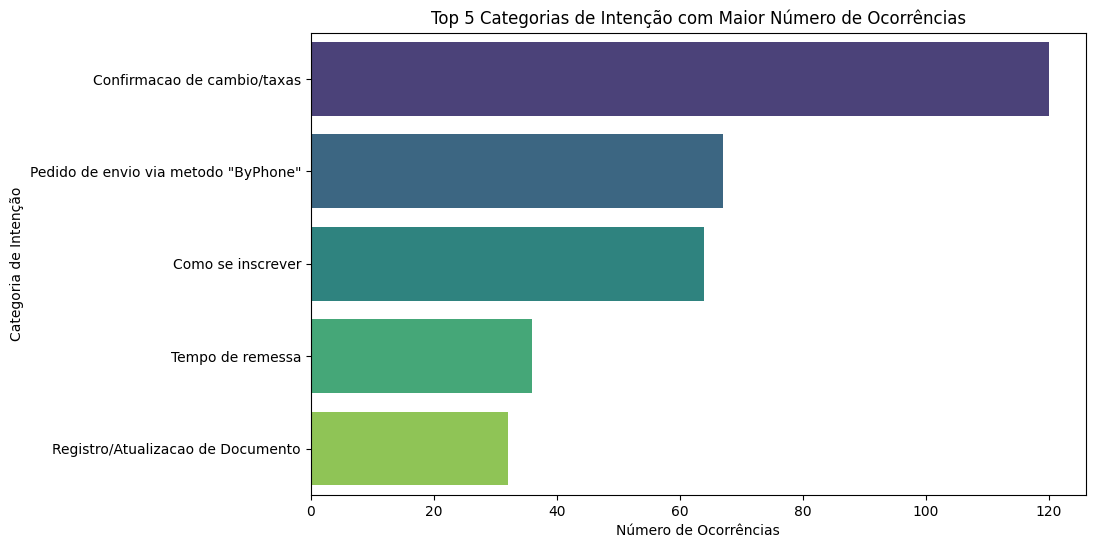

In [224]:
# Criando o gráfico de barras
top_5_intencoes = df['Intencao'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_intencoes.values, y=top_5_intencoes.index, palette='viridis')
plt.title('Top 5 Categorias de Intenção com Maior Número de Ocorrências')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Categoria de Intenção')
plt.show()

### Respondendo a pergunta "Quais são as palavras mais usadas em perguntas, respostas e no total?"

Foi analisado também na base de dados as palavras mais utilizadas na feature "Pergunta", "Resposta" e no total ("Pergunta" e "Resposta"). Entretanto a maioria destas palavras não são interessantes para tirar insights relevantes para o desenvolvimento do projeto. Deste modo, também foi decidido criar outras perguntas que pudessem contribuir mais com o projeto.

In [225]:
# Importa e baixa a lista de stopwords (palavras de parada) em português do pacote NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Une todas as perguntas do DataFrame em uma única string, separadas por espaço, ignorando valores nulos
texto_perguntas = ' '.join(df['Pergunta'].dropna())

# Remove todas as pontuações do texto e converte para minúsculas
texto_limpo = re.sub(r'[^\w\s]', '', texto_perguntas.lower())

# Divide o texto em palavras individuais
palavras = texto_limpo.split()

# Remove as stopwords da lista de palavras
palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stop_words]

# Conta a frequência de cada palavra que não é uma stopword
frequencia_palavras = Counter(palavras_sem_stopwords)

# Seleciona as 10 palavras mais frequentes e suas respectivas frequências
top_10_palavras = frequencia_palavras.most_common(10)

# Separa as palavras e as frequências em duas listas diferentes
palavras, frequencias = zip(*top_10_palavras)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


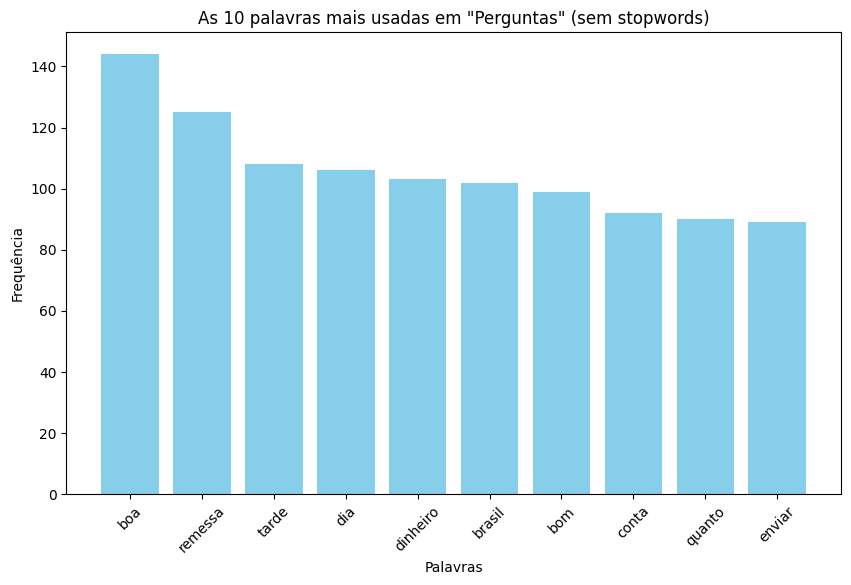

In [226]:
# Define o tamanho da figura para o gráfico (10 de largura por 6 de altura)
plt.figure(figsize=(10, 6))

# Cria um gráfico de barras usando as palavras como rótulos no eixo x e as frequências no eixo y
plt.bar(palavras, frequencias, color='skyblue')

# Adiciona um título ao gráfico
plt.title('As 10 palavras mais usadas em "Perguntas" (sem stopwords)')

# Adiciona um rótulo ao eixo x (Palavras)
plt.xlabel('Palavras')

# Adiciona um rótulo ao eixo y (Frequência)
plt.ylabel('Frequência')

# Gira os rótulos do eixo x em 45 graus para facilitar a leitura
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

In [227]:
# Une todas as respostas do DataFrame em uma única string, separadas por espaço, ignorando valores nulos
texto_respostas = ' '.join(df['Resposta\n'].dropna())

# Remove todas as pontuações do texto e converte para minúsculas
texto_limpo = re.sub(r'[^\w\s]', '', texto_respostas.lower())

# Divide o texto em palavras individuais
palavras = texto_limpo.split()

# Remove as stopwords da lista de palavras
palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stop_words]

# Conta a frequência de cada palavra que não é uma stopword
frequencia_palavras = Counter(palavras_sem_stopwords)

# Seleciona as 10 palavras mais frequentes e suas respectivas frequências
top_10_palavras = frequencia_palavras.most_common(10)

# Separa as palavras e as frequências em duas listas diferentes
palavras, frequencias = zip(*top_10_palavras)

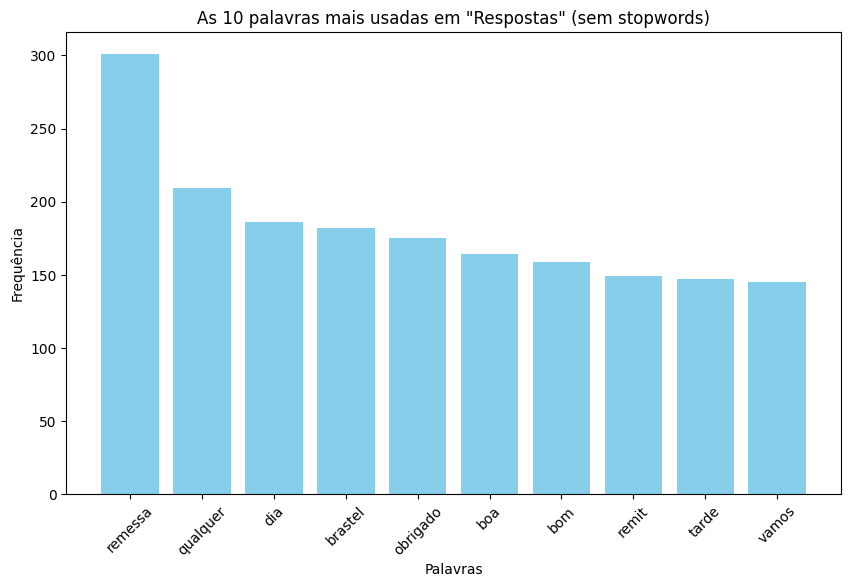

In [228]:
# Define o tamanho da figura para o gráfico (10 de largura por 6 de altura)
plt.figure(figsize=(10, 6))

# Cria um gráfico de barras usando as palavras como rótulos no eixo x e as frequências no eixo y
plt.bar(palavras, frequencias, color='skyblue')

# Adiciona um título ao gráfico
plt.title('As 10 palavras mais usadas em "Respostas" (sem stopwords)')

# Adiciona um rótulo ao eixo x (Palavras)
plt.xlabel('Palavras')

# Adiciona um rótulo ao eixo y (Frequência)
plt.ylabel('Frequência')

# Gira os rótulos do eixo x em 45 graus para facilitar a leitura
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

In [229]:
# Combina todas as perguntas e respostas do DataFrame em uma única string, separadas por espaço, ignorando valores nulos
texto_combinado = ' '.join(df['Pergunta'].dropna()) + ' ' + ' '.join(df['Resposta\n'].dropna())

# Remove todas as pontuações do texto combinado e converte para minúsculas
texto_limpo = re.sub(r'[^\w\s]', '', texto_combinado.lower())

# Divide o texto em palavras individuais
palavras = texto_limpo.split()

# Remove as stopwords da lista de palavras
palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stop_words]

# Conta a frequência de cada palavra que não é uma stopword
frequencia_palavras = Counter(palavras_sem_stopwords)

# Seleciona as 10 palavras mais frequentes e suas respectivas frequências
top_10_palavras = frequencia_palavras.most_common(10)

# Separa as palavras e as frequências em duas listas diferentes
palavras, frequencias = zip(*top_10_palavras)

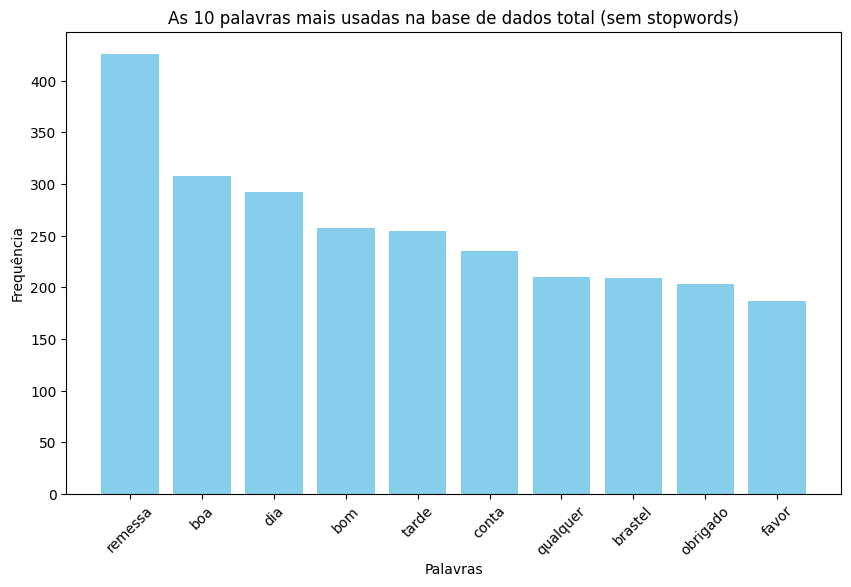

In [230]:
# Define o tamanho da figura para o gráfico (10 de largura por 6 de altura)
plt.figure(figsize=(10, 6))

# Cria um gráfico de barras usando as palavras como rótulos no eixo x e as frequências no eixo y
plt.bar(palavras, frequencias, color='skyblue')

# Adiciona um título ao gráfico
plt.title('As 10 palavras mais usadas na base de dados total (sem stopwords)')

# Adiciona um rótulo ao eixo x (Palavras)
plt.xlabel('Palavras')

# Adiciona um rótulo ao eixo y (Frequência)
plt.ylabel('Frequência')

# Gira os rótulos do eixo x em 45 graus para facilitar a leitura
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

### Respondendo a pergunta "Quantas mensagens estão relacionadas a "depósito", "inscrição", "cartão" e "remessa"?"

Estas palavras chaves que foram escolhidas pelo grupo por acreditarmos representar bem o contexto do projeto e assim tirar resultados relevantes na pipeline de dados.

Quantidade de mensagens relacionadas à "depósito"

In [231]:
# Contando as mensagens que contêm o radical "deposit" na coluna 'Pergunta'
mensagens_deposito_pergunta = df['Pergunta'].str.contains(r'deposit', case=False, na=False)

# Contando as mensagens que contêm o radical "deposit" na coluna 'Resposta\n'
mensagens_deposito_resposta = df['Resposta\n'].str.contains(r'deposit', case=False, na=False)

# Número de mensagens relacionadas a "depósito" em 'Pergunta'
num_mensagens_deposito_pergunta = mensagens_deposito_pergunta.sum()

# Número de mensagens relacionadas a "depósito" em 'Resposta\n'
num_mensagens_deposito_resposta = mensagens_deposito_resposta.sum()

In [232]:
# Exibindo os resultados
print(f"Quantidade de mensagens relacionadas a 'depósito' na coluna 'Pergunta': {num_mensagens_deposito_pergunta}")
print(f"Quantidade de mensagens relacionadas a 'depósito' na coluna 'Resposta\\n': {num_mensagens_deposito_resposta}")
print(f"Total de mensagens relacionadas a 'depósito': {num_mensagens_deposito_pergunta + num_mensagens_deposito_resposta }")

Quantidade de mensagens relacionadas a 'depósito' na coluna 'Pergunta': 39
Quantidade de mensagens relacionadas a 'depósito' na coluna 'Resposta\n': 31
Total de mensagens relacionadas a 'depósito': 70


Quantidade de mensagens relacionadas à "inscrição"

In [233]:
# Contando as mensagens que contêm o radical "deposit"
mensagens_inscricao_pergunta = df['Pergunta'].str.contains(r'inscr', case=False, na=False)

mensagens_inscricao_resposta = df['Resposta\n'].str.contains(r'inscr', case=False, na=False)

# Número de mensagens relacionadas a "depósito"
mensagens_inscricao_pergunta = mensagens_inscricao_pergunta.sum()

mensagens_inscricao_resposta = mensagens_inscricao_resposta.sum()

In [234]:
print(f"Quantidade de mensagens relacionadas a 'inscrição' na coluna 'Pergunta': {mensagens_inscricao_pergunta}")
print(f"Quantidade de mensagens relacionadas a 'inscrição' na coluna 'Resposta': {mensagens_inscricao_resposta}")
print(f"Total de mensagens relacionadas a 'inscrição': {mensagens_inscricao_pergunta + mensagens_inscricao_resposta}")

Quantidade de mensagens relacionadas a 'inscrição' na coluna 'Pergunta': 27
Quantidade de mensagens relacionadas a 'inscrição' na coluna 'Resposta': 78
Total de mensagens relacionadas a 'inscrição': 105


Quantidade de mensagen relacionadas à palavra "cartão"

In [235]:
# Contando as mensagens que contêm o radical "deposit"
mensagens_cartao_pergunta = df['Pergunta'].str.contains(r'cartão', case=False, na=False)
mensagens_cartao_resposta = df['Resposta\n'].str.contains(r'cartão', case=False, na=False)

# Número de mensagens relacionadas a "depósito"
mensagens_cartao_pergunta = mensagens_cartao_pergunta.sum()

mensagens_cartao_resposta = mensagens_cartao_resposta.sum()

In [236]:
print(f"Quantidade de mensagens relacionadas a 'cartão' na coluna 'Pergunta': {mensagens_cartao_pergunta}")
print(f"Quantidade de mensagens relacionadas a 'cartão' na coluna 'Resposta': {mensagens_cartao_resposta}")
print(f"Quantidade total de mensagens relacionadas a 'cartão': {mensagens_cartao_pergunta + mensagens_cartao_resposta}")

Quantidade de mensagens relacionadas a 'cartão' na coluna 'Pergunta': 54
Quantidade de mensagens relacionadas a 'cartão' na coluna 'Resposta': 48
Quantidade total de mensagens relacionadas a 'cartão': 102


Quantidade de palavras relacionadas à "remessa"

In [237]:
# Contando as mensagens que contêm o radical "deposit"
mensagens_remessa_pergunta = df['Pergunta'].str.contains(r'remessa', case=False, na=False)

# Contando as mensagens que contêm o radical "deposit"
mensagens_remessa_resposta = df['Resposta\n'].str.contains(r'remessa', case=False, na=False)

# Número de mensagens relacionadas a "depósito"
mensagens_remessa_pergunta = mensagens_deposito_pergunta.sum()

# Número de mensagens relacionadas a "depósito"
mensagens_remessa_resposta = mensagens_remessa_resposta.sum()

In [238]:
print(f"Quantidade de mensagens relacionadas a 'remessas': {mensagens_remessa_pergunta}")
print(f"Quantidade de mensagens relacionadas a 'remessas': {mensagens_remessa_resposta}")
print(f"Quantidade total de mensagens relacionadas a 'remessas': {mensagens_remessa_pergunta + mensagens_remessa_resposta}")

Quantidade de mensagens relacionadas a 'remessas': 39
Quantidade de mensagens relacionadas a 'remessas': 256
Quantidade total de mensagens relacionadas a 'remessas': 295


Quantidade de palavras relacionados à "app" ou "aplicativo"

In [239]:
# Função para contar a ocorrência de palavras "app" e "aplicativo"
def contar_palavras(texto, palavras):
    # Verifica se o texto é uma string
    if isinstance(texto, str):
        # Conta o número de vezes que cada palavra aparece no texto
        return sum(texto.lower().split().count(palavra) for palavra in palavras)
    return 0

In [240]:
# Lista das palavras a serem contadas
palavras_chave = ['app', 'aplicativo']

# Aplicar a função em todas as linhas da coluna 'Pergunta' e 'Resposta\n'
df['Contagem_app_pergunta'] = df['Pergunta'].apply(lambda x: contar_palavras(x, palavras_chave))
df['Contagem_app_resposta'] = df['Resposta\n'].apply(lambda x: contar_palavras(x, palavras_chave))

# Somando as ocorrências para obter o total de palavras "app" e "aplicativo"
total_app_pergunta = df['Contagem_app_pergunta'].sum()
total_app_resposta = df['Contagem_app_resposta'].sum()

In [241]:
# Exibindo os resultados
print(f"Quantidade total de palavras 'app' ou 'aplicativo' na coluna 'Pergunta': {total_app_pergunta}")
print(f"Quantidade total de palavras 'app' ou 'aplicativo' na coluna 'Resposta\\n': {total_app_resposta}")
print(f"Quantidade total de palavras 'app' ou 'aplicativo' na coluna 'Resposta\\n': {total_app_pergunta + total_app_resposta}")

Quantidade total de palavras 'app' ou 'aplicativo' na coluna 'Pergunta': 24
Quantidade total de palavras 'app' ou 'aplicativo' na coluna 'Resposta\n': 180
Quantidade total de palavras 'app' ou 'aplicativo' na coluna 'Resposta\n': 204


### Quantas mensagens nos campos "Pergunta" e "Resposta" são duplicadas?

Esta etapa visa responder quantidade de conversas que estão repetidas ao decorrer da base de dados. Na feature de "Pergunta" existem 68 repetições, portanto 13.46% da base de "Pergunta" é repetida. Enquanto na feature de "Resposta" são 87 ocorrências o que corresponde à 17,23%. Sendo assim 30.69% total da base de dados é repetida.

In [242]:
# Conta a quantidade de vezes que cada valor aparece na coluna 'Pergunta'
value_counts = df['Pergunta'].value_counts()

# Filtra os valores que aparecem mais de uma vez
repeated_values = value_counts[value_counts > 1]

# Calcula a quantidade total de repetições removendo o número de valores únicos
amount_of_repeats = repeated_values.sum() - len(repeated_values)

# Imprime a quantidade total de repetições
print(amount_of_repeats)

68


In [243]:
# Conta a quantidade de vezes que cada valor aparece na coluna 'Resposta\n'
value_counts = df['Resposta\n'].value_counts()

# Filtra os valores que aparecem mais de uma vez
repeated_values = value_counts[value_counts > 1]

# Calcula a quantidade total de repetições removendo o número de valores únicos
amount_of_repeats = repeated_values.sum() - len(repeated_values)

# Imprime a quantidade total de repetições
print(amount_of_repeats)

87


### Respondendo a pergunta "Quantas perguntas são feitas sobre conversão e taxas?"

Esta análise busca quantificar as perguntas feitas pelos clientes que estão relacionadas à conversão de moedas e pagamento de taxas de remessa

In [244]:
# Contando as mensagens que contêm o radical "taxa"
mensagens_taxa = df['Pergunta'].str.contains(r'taxa', case=False, na=False)

# Número de mensagens relacionadas a "taxa"
num_mensagens_taxa = mensagens_taxa.sum()

# Contando as ocorrências da categoria "Confirmacao de cambio/taxas" na coluna "Intencao"
num_confirmacao_cambio_taxas = df['Intencao'].str.contains(r'Confirmacao de cambio/taxas', case=False, na=False).sum()

# Somando as quantidades
total_ocorrencias = num_mensagens_taxa + num_confirmacao_cambio_taxas

print(f"Quantidade total de mensagens relacionadas a 'perguntas sobre conversões e taxas': {total_ocorrencias}")


Quantidade total de mensagens relacionadas a 'perguntas sobre conversões e taxas': 149


### Respondendo a pergunta "Quantas mensagens mencionam "erro" ou "problema"?"

Esta etapa mostra a quantidade de ocorrências na base de dados que estão relacionadas às conversas entre os clientes e operadores que relatam problemas que aconteceram na plataforma.

In [245]:
# Contando as mensagens que contêm o radical "taxa"
mensagens_err_pergunta = df['Pergunta'].str.contains(r'erro', case=False, na=False)
mensagens_prob_pergunta = df['Pergunta'].str.contains(r'problema', case=False, na=False)

# Contando as mensagens que contêm o radical "taxa"
mensagens_err_resposta = df['Resposta\n'].str.contains(r'erro', case=False, na=False)
mensagens_prob_resposta = df['Resposta\n'].str.contains(r'problema', case=False, na=False)

# Número de mensagens relacionadas a "depósito"
num_mensagens_pergunta = mensagens_err_pergunta.sum() + mensagens_prob_pergunta.sum()

# Número de mensagens relacionadas a "depósito"
num_mensagens_resposta = mensagens_err_resposta.sum() + mensagens_prob_resposta.sum()


print(f"Quantidade de mensagens relacionadas a 'erro' e 'problema': {num_mensagens_pergunta + num_mensagens_resposta}")

Quantidade de mensagens relacionadas a 'erro' e 'problema': 14


### Respondendo a pergunta "Quantas mensagens falam sobre "limites de transferência/depósito/remessa"?"

Etapa em que quantifica a quantidade de ocorrências de conversas relacionadas aos limites de transferência, depósito e remessas financeiras.

In [246]:
# Verifica se o termo 'limite' está presente na coluna 'Pergunta', ignorando maiúsculas/minúsculas e tratando valores nulos como False
mensagens_prob_remessa_pergunta = df['Pergunta'].str.contains(r'limite', case=False, na=False)

# Verifica se o termo 'limite' está presente na coluna 'Resposta\n', ignorando maiúsculas/minúsculas e tratando valores nulos como False
mensagens_prob_remessa_resposta = df['Resposta\n'].str.contains(r'limite', case=False, na=False)

# Conta o número total de mensagens na coluna 'Pergunta' que contêm o termo 'limite'
num_mensagens_prob_remessa_pergunta = mensagens_prob_remessa_pergunta.sum()

# Conta o número total de mensagens na coluna 'Resposta\n' que contêm o termo 'limite'
num_mensagens_prob_remessa_resposta = mensagens_prob_remessa_resposta.sum()

# Calcula a quantidade total de mensagens relacionadas a 'limite' somando as contagens das colunas 'Pergunta' e 'Resposta\n'
print(f"Quantidade de mensagens relacionadas a 'limites de transferência/remessa': {num_mensagens_prob_remessa_pergunta + num_mensagens_prob_remessa_resposta}")

Quantidade de mensagens relacionadas a 'limites de transferência/remessa': 13


### Respondendo a pergunta "Quantas mensagens mencionam "tempo do valor chegar no beneficiário?"

Etapa que calcula a quantidade de ocorrências em que o cliente pergunta o tempo que a remessa pode levar para chegar no beneficiário

In [247]:
# Contando as mensagens que contêm o radical "tempo"
mensagens_tempo = df['Pergunta'].str.contains(r'tempo', case=False, na=False)

# Número de mensagens relacionadas a "depósito"
num_mensagens_tempo = mensagens_tempo.sum()

print(f"Quantidade de mensagens relacionadas a 'tempo do valor chegar no beneficiário': {num_mensagens_taxa}")

Quantidade de mensagens relacionadas a 'tempo do valor chegar no beneficiário': 29


### Respondendo a pergunta "Quantas mensagens incluem perguntas sobre "horário de funcionamento"?"

Caso isolado em que o operador responde sobre o horário de funcionamento bancário

In [248]:
# Contando as mensagens que contêm o radical "tempo"
num_mensagens_horario = df['Resposta\n'].str.contains(r'funcionamento', case=False, na=False)

# Número de mensagens relacionadas a "depósito"
num_mensagens_horario = num_mensagens_horario.sum()

print(f"Quantidade de mensagens relacionadas a 'tempo do valor chegar no beneficiário': {num_mensagens_horario}")

Quantidade de mensagens relacionadas a 'tempo do valor chegar no beneficiário': 1


### Respondendo a pergunta "Quantas mensagens são sobre "confirmação de pagamento"?"

Ocorrências de clientes pedindo a confirmação de pagamento para seus operadores.

In [249]:
# Verifica se o termo 'confirm' está presente na coluna 'Pergunta', ignorando maiúsculas/minúsculas e tratando valores nulos como False
mensagens_confirm_pergunta = df['Pergunta'].str.contains(r'confirm', case=False, na=False)

# Conta o número total de mensagens na coluna 'Pergunta' que contêm o termo 'confirm'
mensagens_confirm_pergunta = mensagens_confirm_pergunta.sum()

# Exibe a quantidade total de mensagens relacionadas a 'confirmação de pagamento'
print(f"Quantidade de mensagens relacionadas a 'confirmação de pagamento': {mensagens_confirm_pergunta}")

Quantidade de mensagens relacionadas a 'confirmação de pagamento': 9


### Repondendo a pergunta "Quantas mensagens incluem links externos?"

Calacular a quantidade de links que foram utilizadas nas conversas. Apenas os operadores enviaram os links externos. Os links serão removidos no pré-processamento.

In [250]:
# Contando as mensagens que contêm o radical "tempo"
mensagens_link = df['Pergunta'].str.contains(r'http', case=False, na=False)

# Número de mensagens relacionadas a "depósito"
num_mensagens_link = mensagens_link.sum()

print(f"Quantidade de perguntas que possuem URLs: {num_mensagens_link}")

Quantidade de perguntas que possuem URLs: 0


In [251]:
# Contando as mensagens que contêm o radical "tempo"
mensagens_link = df['Resposta\n'].str.contains(r'http', case=False, na=False)

# Número de mensagens relacionadas a "depósito"
num_mensagens_link = mensagens_link.sum()

print(f"Quantidade de perguntas que possuem URLs: {num_mensagens_link}")

Quantidade de perguntas que possuem URLs: 81


### Respodendo a pergunta "Quantas abreviações existem na base de dados?"

Quantificação das palavras abreviadas pelos ususários.

In [252]:
# Inicializar o modelo de português do spacy
nlp = spacy.load("pt_core_news_sm")

# Palavras específicas a serem ignoradas como abreviações
palavras_ignoradas = {'bom', 'dia', 'bem', 'oi', 'olá', 'via', 'pix', 'iens', 'ienes', 'yenes', 'sim', 'boa', 'jp', 'yens', 'NN'}

# Função para identificar verbos em um texto
def identificar_verbos(texto):
    doc = nlp(texto)
    verbos = [token.text for token in doc if token.pos_ == "VERB"]
    return set(verbos)

# Função para identificar números escritos por extenso e em algarismos
def identificar_numeros(texto):
    palavras = re.findall(r'\b\w+\b', texto.lower())
    numeros = set()
    for palavra in palavras:
        try:
            # Verifica se a palavra é um número por extenso ou em algarismos
            if palavra.isdigit() or w2n.word_to_num(palavra) is not None:
                numeros.add(palavra)
        except (ValueError, AttributeError):
            continue
    return numeros

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [253]:
# Função para identificar palavras abreviadas
def identificar_abreviacoes(texto):
    verbos_ignorados = identificar_verbos(texto)
    numeros_ignorados = identificar_numeros(texto)
    palavras = re.findall(r'\b\w+\b', texto.lower())
    abreviacoes = [
        palavra for palavra in palavras
        if (len(palavra) < 4 and palavra not in stop_words
            and palavra not in verbos_ignorados
            and palavra not in numeros_ignorados
            and palavra not in palavras_ignoradas)
    ]
    return abreviacoes

In [254]:
# Aplicar as funções nas colunas 'Pergunta' e 'Resposta\n'
df['Abreviacoes'] = df.apply(lambda row: identificar_abreviacoes(str(row['Pergunta']) + ' ' + str(row['Resposta\n'])), axis=1)

# Contar a quantidade total de abreviações
total_abreviacoes = df['Abreviacoes'].apply(len).sum()

# Exibir os resultados
print(f"Total de palavras abreviadas: {total_abreviacoes}")

# Exibir exemplos de abreviações encontradas
print("\nExemplos de abreviações encontradas:")
print(df['Abreviacoes'].head())

Total de palavras abreviadas: 1074

Exemplos de abreviações encontradas:
0      [eh, sr]
1    [app, 24h]
2            []
3            []
4    [bbb, rrr]
Name: Abreviacoes, dtype: object


## Pré-Processamento dos dados

#### Etapa importante para lidar com os textos do dataframe futuramente.
#### Nesta etapa, o processo de pré-processamento de dados foi separado nas seguintes etapas a seguir:

Limpeza dos dados do dataframe: remover os espaços em excesso, converter o texto em uma frase de uma linha, normalizar o texto para que fique todo com letras minúsculas, remover as pontuações, números, símbolos, caracteres especiais e emojis, links e endereços de e-mail;


### Normalização e remoção de dados que não serão utilizados

In [255]:
# Dar espaços após as pontuações
df['Pergunta'] = df['Pergunta'].apply(lambda x: re.sub(r'([.,!?;:])', r'\1 ', str(x)))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: re.sub(r'([.,!?;:])', r'\1 ', str(x)))

# Substituir quebras de linha por espaços
df['Pergunta'] = df['Pergunta'].apply(lambda x: re.sub(r'\n', ' ', str(x)))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: re.sub(r'\n', ' ', str(x)))

# Normalizar o dataframe para letras minúsculas
df['Pergunta'] = df['Pergunta'].str.lower()
df['Resposta\n'] = df['Resposta\n'].str.lower()

# Remover pontuações do dataframe
df['Pergunta'] = df['Pergunta'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Remover números do dataframe
df['Pergunta'] = df['Pergunta'].apply(lambda x: re.sub(r'\d+', '', str(x)))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: re.sub(r'\d+', '', str(x)))

# Remover espaços extras do dataframe
df['Pergunta'] = df['Pergunta'].apply(lambda x: re.sub(r'\s+', ' ', str(x)))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: re.sub(r'\s+', ' ', str(x)))

# Remover URLs
df['Pergunta'] = df['Pergunta'].apply(lambda x: re.sub(r'http\S+', '', str(x)))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: re.sub(r'http\S+', '', str(x)))

# Remover emails
df['Pergunta'] = df['Pergunta'].apply(lambda x: re.sub(r'\S+@\S+', '', str(x)))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: re.sub(r'\S+@\S+', '', str(x)))

# Remover emojis
df['Pergunta'] = df['Pergunta'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', str(x)))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', str(x)))

df

,No,Intencao,Pergunta,Resposta\n,Palavras_japonesas_pergunta,Palavras_japonesas_resposta,Contagem_app_pergunta,Contagem_app_resposta,Abreviacoes
0,1,Como depositar,boa dia tudo bem eu gostaria de saber sobre aq...,bom dia sim o sr pode utilizar o carto de deps...,[],[],0,0,"[eh, sr]"
1,2,Como fazer remessa,como enviar dinheiro do japo,para se inscrever no servio de remessa por fav...,[],[],0,2,"[app, 24h]"
2,3,Tempo de remessa,quanto tempo levar para o beneficirio receber ...,via de regra as remessas sero pagas via pix de...,[],[],0,0,[]
3,4,"Pedido de envio via metodo ""ByPhone""",boa tarde acabei de fazer a transferncia de to...,iremos processar a sua solicitacao muito obrig...,[],[],0,0,[]
4,5,"Pedido de envio via metodo ""ByPhone""",poderia fazer a remessa de yenes para o bbb rr...,iremos processar a sua solicitacao muito obrig...,[],[],0,0,"[bbb, rrr]"
...,...,...,...,...,...,...,...,...,...
500,501,Atualizacao de dados cadastrais,boa tarde como fao para fazer a mudana de ende...,a senhora pode trocar pelo prprio app da brast...,[],[],0,1,[app]
501,502,Tempo de entrega do cartao,bom dia consegui fazer depsito sem o carto que...,boa noite o sr solicitou dia ser entregue em a...,[],[],0,0,[sr]
502,503,Cancelamento,boa noite a beneficiria me avisou que a conta ...,sim podemos cancelar o valor voltar no seu sal...,[],[],0,0,[mim]
503,504,Reembolso,boa noite eu fiz um depsito errado era pra dep...,possvel solicitar o reembolso diretamente do ...,[],[],0,0,"[pra, pro, app, app]"


### Remoção de stopwords

Remoção de Stopwords: remove as "palavras de parada", que são os artigos, pronomes e palavras usadas com muita frequência e acabam tendo pouco significado no texto e, em alguns casos, se tornando irrelevantes;

In [256]:
# Remoção de Stopwords do dataframe
df['Pergunta'] = df['Pergunta'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df

,No,Intencao,Pergunta,Resposta\n,Palavras_japonesas_pergunta,Palavras_japonesas_resposta,Contagem_app_pergunta,Contagem_app_resposta,Abreviacoes
0,1,Como depositar,boa dia tudo bem gostaria saber sobre caixa fa...,bom dia sim sr pode utilizar carto depsitos ne...,[],[],0,0,"[eh, sr]"
1,2,Como fazer remessa,enviar dinheiro japo,inscrever servio remessa favor baixe aplicativ...,[],[],0,2,"[app, 24h]"
2,3,Tempo de remessa,quanto tempo levar beneficirio receber dinheiro,via regra remessas sero pagas via pix dentro a...,[],[],0,0,[]
3,4,"Pedido de envio via metodo ""ByPhone""",boa tarde acabei fazer transferncia total yenes,iremos processar solicitacao obrigada otima tarde,[],[],0,0,[]
4,5,"Pedido de envio via metodo ""ByPhone""",poderia fazer remessa yenes bbb rrr obrigado y...,iremos processar solicitacao obrigada otima tarde,[],[],0,0,"[bbb, rrr]"
...,...,...,...,...,...,...,...,...,...
500,501,Atualizacao de dados cadastrais,boa tarde fao fazer mudana endereo,senhora pode trocar prprio app brastel menu co...,[],[],0,1,[app]
501,502,Tempo de entrega do cartao,bom dia consegui fazer depsito carto ainda che...,boa noite sr solicitou dia entregue at dias te...,[],[],0,0,[sr]
502,503,Cancelamento,boa noite beneficiria avisou conta est errado ...,sim podemos cancelar valor voltar saldo brastel,[],[],0,0,[mim]
503,504,Reembolso,boa noite fiz depsito errado pra depositar con...,possvel solicitar reembolso diretamente app at...,[],[],0,0,"[pra, pro, app, app]"


### Dicionário das abreviações encontradas na base de dados

Dicionário para conversão de abreviações para palavras por extenso: foi feita uma análise das principais abreviações que apareciam no dataframe e, com base nisso, criado um dicionário que é usado para substituir cada abreviação por sua palavra por extenso através de um loop que percorre as principais colunas que estamos usando;

In [257]:
# Criação de um dicionário para tratar abreviações do dataframe
abreviacoes = {
    'add': 'adicionar',
    'app': 'aplicativo',
    'pq': 'porque',
    'vc': 'você',
    'vcs': 'vocês',
    'sr': 'senhor',
    'sra': 'senhora',
    'srto': 'senhorito',
    'srta': 'senhorita',
    'qdo': 'quando',
    'qdo': 'quando',
    'qt': 'quanto',
    'qto': 'quanto',
    'pra': 'para',
    'q': 'que',
    'p': 'para',
    'pf': 'por favor',
    'yenes': 'ienes',
    'yens': 'ienes',
    'iens': 'ienes',
    'hj': 'hoje',
    'obg': 'obrigado',
    'td': 'tudo',
    'bm': 'bom',
}

### Aplicação do dicionário de abreviações na base de dados

Aplicação da tradução dos dados abreviados na base de dados

In [258]:
# Substituindo as abreviações das palavras para extenso
for abreviacao, palavra in abreviacoes.items():
    df['Pergunta'] = df['Pergunta'].str.replace(r'\b' + abreviacao + r'\b', palavra, regex=True)
    df['Resposta\n'] = df['Resposta\n'].str.replace(r'\b' + abreviacao + r'\b', palavra, regex=True)

df['Pergunta'][0]

'boa dia tudo bem gostaria saber sobre caixa family mart verde eh horas posso transferir qualquer hora obrigado'

## Correção ortográfica do DataFrame

In [259]:
# Inicializa o corretor ortográfico
hs = hunspell.HunSpell('pt_BR.dic', 'pt_BR.aff')

In [260]:
# Função para corrigir palavras
def corrigir_palavra(palavra):
  if hs.spell(palavra):
    return palavra
  else:
    palavras_similares = hs.suggest(palavra)
    if palavras_similares:
      return palavras_similares[0]
    else:
      return palavra

In [261]:
# Função para corrigir uma frase
def corrigir_frase(frase):
  if isinstance(frase, str):
    palavras_corrigidas = [corrigir_palavra(palavra) for palavra in frase.split()]
    print('teste: ', palavras_corrigidas)
    return ' '.join(palavras_corrigidas)
  else:
    print('OI')
    return frase

In [262]:
df['perguntas_corrigidas'] = df['Pergunta'].apply(corrigir_frase)

teste:  ['boa', 'dia', 'tudo', 'bem', 'gostaria', 'saber', 'sobre', 'caixa', 'familial', 'mar', 'verde', 'eh', 'horas', 'posso', 'transferir', 'qualquer', 'hora', 'obrigado']
teste:  ['enviar', 'dinheiro', 'japi']
teste:  ['quanto', 'tempo', 'levar', 'beneficiário', 'receber', 'dinheiro']
teste:  ['boa', 'tarde', 'acabei', 'fazer', 'transferência', 'total', 'ienes']
teste:  ['poderia', 'fazer', 'remessa', 'ienes', 'BB', 'rer', 'obrigado', 'ienes', 'AA', 'mm mm', 'vvvvv', 'caixa', 'econômica', 'federal', 'obrigado']
teste:  ['boa', 'tarde', 'acabei', 'fazer', 'transferência', 'conta', 'vos', 'valor', 'descontado', 'taxa', 'vos']
teste:  ['boa', 'tarde', 'beneficiária', 'yyy', 'UFF', 'yyy']
teste:  ['posso', 'inscrever', 'servi-o', 'remessa']
teste:  ['boa', 'noite', 'gostaria', 'tirar', 'vida', 'porque', 'cota-o', 'dl ar', 'set', 'aplicativo', 'set']
teste:  ['bom', 'dia', 'hoje', 'fiz', 'depósito', 'acho', 'esqueci', 'digitar', 'digo', 'favor', 'verifique', 'para', 'mim', 'fico', 'agua

In [265]:
df['respostas_corrigidas'] = df['Resposta\n'].apply(corrigir_frase)

teste:  ['bom', 'dia', 'sim', 'senhor', 'pode', 'utilizar', 'carto', 'depósitos', 'nesta', 'quinas', 'horas', 'exclusivas', 'já', 'bane']
teste:  ['inscrever', 'servi-o', 'remessa', 'favor', 'baixe', 'aplicativo', 'rabastel', 'remir', 'registre', 'todos', 'dados', 'solicitados', 'assim', 'vamos', 'validar', 'inscrito', 'vos', 'j', 'poder', 'registrar', 'beneficiários', 'aplicativo', 'rabastel', 'remir', 'vos', 'tera', 'independência', 'fazer', 'remessa', 'conta', 'própria', 'qualquer', 'horário', 'braquistelma', 'jpporh']
teste:  ['via', 'regra', 'remessas', 'serro', 'pagas', 'via', 'pi', 'dentro', 'algumas', 'horas', 'todos', 'dados', 'corretos']
teste:  ['iremos', 'processar', 'solicitação', 'obrigada', 'otina', 'tarde']
teste:  ['iremos', 'processar', 'solicitação', 'obrigada', 'otina', 'tarde']
teste:  ['bom', 'dia', 'processaremos', 'conforme', 'solicitado', 'obrigado']
teste:  ['bom', 'dia', 'processaremos', 'conforme', 'solicitado', 'obrigado']
teste:  ['inscrever', 'servi-o', '

In [268]:
df['perguntas_corrigidas']

,perguntas_corrigidas
0,boa dia tudo bem gostaria saber sobre caixa fa...
1,enviar dinheiro japi
2,quanto tempo levar beneficiário receber dinheiro
3,boa tarde acabei fazer transferência total ienes
4,poderia fazer remessa ienes BB rer obrigado ie...
...,...
500,boa tarde FAO fazer mudama endereço
501,bom dia consegui fazer depósito carto ainda ch...
502,boa noite beneficiária avisou conta set errado...
503,boa noite fiz depósito errado para depositar c...


In [269]:
df['respostas_corrigidas']

,respostas_corrigidas
0,bom dia sim senhor pode utilizar carto depósit...
1,inscrever servi-o remessa favor baixe aplicati...
2,via regra remessas serro pagas via pi dentro a...
3,iremos processar solicitação obrigada otina tarde
4,iremos processar solicitação obrigada otina tarde
...,...
500,senhora pode trocar próprio aplicativo rabaste...
501,boa noite senhor solicitou dia entregue ar dia...
502,sim podemos cancelar valor voltar saldo rabastel
503,possível solicitar reembolso diretamente aplic...


## Lematização dos dados

Lematização: o processo de lematização identifica qual é a palavra e a transforma em sua forma base ou lema, o que é útil para normalização e interpretação do texto

In [270]:
nlp = spacy.load("pt_core_news_sm")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [271]:
def lematizar_texto(texto):
  doc = nlp(texto)
  lemmas = [token.lemma_ for token in doc]
  lemmas = ' '.join(lemmas)
  return lemmas

In [272]:
# Processo de Tokenização do DataFrame
df['Pergunta'] = df['Pergunta'].astype(str).apply(lambda x: lematizar_texto(x))
df['Resposta\n'] = df['Resposta\n'].astype(str).apply(lambda x: lematizar_texto(x))

df

,No,Intencao,Pergunta,Resposta\n,Palavras_japonesas_pergunta,Palavras_japonesas_resposta,Contagem_app_pergunta,Contagem_app_resposta,Abreviacoes,perguntas_corrigidas,respostas_corrigidas
0,1,Como depositar,bom dia tudo bem gostar saber sobre caixa fami...,bom dia sim senhor poder utilizar carto depsit...,[],[],0,0,"[eh, sr]",boa dia tudo bem gostaria saber sobre caixa fa...,bom dia sim senhor pode utilizar carto depósit...
1,2,Como fazer remessa,enviar dinheiro japo,inscrever servio remessar favor baixe aplicati...,[],[],0,2,"[app, 24h]",enviar dinheiro japi,inscrever servi-o remessa favor baixe aplicati...
2,3,Tempo de remessa,quanto tempo levar beneficirio receber dinheiro,via regro remessa sero pago ver pix dentro alg...,[],[],0,0,[],quanto tempo levar beneficiário receber dinheiro,via regra remessas serro pagas via pi dentro a...
3,4,"Pedido de envio via metodo ""ByPhone""",bom tarde acabar fazer transferncia total iene,ir processar solicitacao obrigado otimar tarde,[],[],0,0,[],boa tarde acabei fazer transferência total ienes,iremos processar solicitação obrigada otina tarde
4,5,"Pedido de envio via metodo ""ByPhone""",poder fazer remesso iene bbb rrr obrigar iene ...,ir processar solicitacao obrigado otimar tarde,[],[],0,0,"[bbb, rrr]",poderia fazer remessa ienes BB rer obrigado ie...,iremos processar solicitação obrigada otina tarde
...,...,...,...,...,...,...,...,...,...,...,...
500,501,Atualizacao de dados cadastrais,bom tarde fao fazer mudana endereo,senhora poder trocar prprio aplicativo Brastel...,[],[],0,1,[app],boa tarde FAO fazer mudama endereço,senhora pode trocar próprio aplicativo rabaste...
501,502,Tempo de entrega do cartao,bom dia conseguir fazer depsito carto ainda ch...,bom noite senhor solicitar dia entregar at dia...,[],[],0,0,[sr],bom dia consegui fazer depósito carto ainda ch...,boa noite senhor solicitou dia entregue ar dia...
502,503,Cancelamento,bom noite beneficir avisar conta est errar ped...,sim poder cancelar valor voltar saldo brastel,[],[],0,0,[mim],boa noite beneficiária avisou conta set errado...,sim podemos cancelar valor voltar saldo rabastel
503,504,Reembolso,bom noite fiz depsizer errar para depositar co...,possvel solicitar reembolso diretamente aplica...,[],[],0,0,"[pra, pro, app, app]",boa noite fiz depósito errado para depositar c...,possível solicitar reembolso diretamente aplic...


In [273]:
# Remoção das palavras em Inglês do dataframe
df['Pergunta'] = df['Pergunta'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words_en]))

## Tokenização

Após a limpeza e a conversão das abreviações, é feita a tokenização das frases, convertendo-as em palavras individuais, o que facilita no processo de generalização e conversão feita no próximo passo de pré-processamento;

In [274]:
# Processo de Tokenização do DataFrame
df['Pergunta'] = df['Pergunta'].apply(lambda x: word_tokenize(x))
df['Resposta\n'] = df['Resposta\n'].apply(lambda x: word_tokenize(x))

df

,No,Intencao,Pergunta,Resposta\n,Palavras_japonesas_pergunta,Palavras_japonesas_resposta,Contagem_app_pergunta,Contagem_app_resposta,Abreviacoes,perguntas_corrigidas,respostas_corrigidas
0,1,Como depositar,"[bom, dia, tudo, bem, gostar, saber, sobre, ca...","[bom, dia, sim, senhor, poder, utilizar, carto...",[],[],0,0,"[eh, sr]",boa dia tudo bem gostaria saber sobre caixa fa...,bom dia sim senhor pode utilizar carto depósit...
1,2,Como fazer remessa,"[enviar, dinheiro, japo]","[inscrever, servio, remessar, favor, baixe, ap...",[],[],0,2,"[app, 24h]",enviar dinheiro japi,inscrever servi-o remessa favor baixe aplicati...
2,3,Tempo de remessa,"[quanto, tempo, levar, beneficirio, receber, d...","[via, regro, remessa, sero, pago, ver, pix, de...",[],[],0,0,[],quanto tempo levar beneficiário receber dinheiro,via regra remessas serro pagas via pi dentro a...
3,4,"Pedido de envio via metodo ""ByPhone""","[bom, tarde, acabar, fazer, transferncia, tota...","[ir, processar, solicitacao, obrigado, otimar,...",[],[],0,0,[],boa tarde acabei fazer transferência total ienes,iremos processar solicitação obrigada otina tarde
4,5,"Pedido de envio via metodo ""ByPhone""","[poder, fazer, remesso, iene, bbb, rrr, obriga...","[ir, processar, solicitacao, obrigado, otimar,...",[],[],0,0,"[bbb, rrr]",poderia fazer remessa ienes BB rer obrigado ie...,iremos processar solicitação obrigada otina tarde
...,...,...,...,...,...,...,...,...,...,...,...
500,501,Atualizacao de dados cadastrais,"[bom, tarde, fao, fazer, mudana, endereo]","[senhora, poder, trocar, prprio, aplicativo, B...",[],[],0,1,[app],boa tarde FAO fazer mudama endereço,senhora pode trocar próprio aplicativo rabaste...
501,502,Tempo de entrega do cartao,"[bom, dia, conseguir, fazer, depsito, carto, a...","[bom, noite, senhor, solicitar, dia, entregar,...",[],[],0,0,[sr],bom dia consegui fazer depósito carto ainda ch...,boa noite senhor solicitou dia entregue ar dia...
502,503,Cancelamento,"[bom, noite, beneficir, avisar, conta, est, er...","[sim, poder, cancelar, valor, voltar, saldo, b...",[],[],0,0,[mim],boa noite beneficiária avisou conta set errado...,sim podemos cancelar valor voltar saldo rabastel
503,504,Reembolso,"[bom, noite, fiz, depsizer, errar, para, depos...","[possvel, solicitar, reembolso, diretamente, a...",[],[],0,0,"[pra, pro, app, app]",boa noite fiz depósito errado para depositar c...,possível solicitar reembolso diretamente aplic...


## Teste do Pré-processamento

In [ ]:

data = {
    'Pergunta': ["Bom dia! Hoje eu fiz um depósito! Acho que esqueci de digitar o código. Por favor Verifique pra mim. Fico no aguardo da confirmação! Obrigado",
                 "Boa tarde! Por gentileza alguém pode me ajudar? Por favor preciso enviar ainda hj dinheiro. Preciso de uma senha temporária agora para fazer um remessa"],
    'Resposta': ["Bom dia! Obrigado pelo envio do comprovante, vamos colocar o saldo no seu aplicativo.",
                 "Com o app Brastel Remit você tera independência para fazer a remessa por conta propria e a qualquer horario https://brastelremit.jp/por/24h"]
}

df_teste = pd.DataFrame(data)


In [ ]:
def testar_remocao_pontuacao(df_teste):
    df_teste['Pergunta'] = df_teste['Pergunta'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
    df_teste['Resposta'] = df_teste['Resposta'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

    print("Pergunta processada:", df_teste['Pergunta'][0])
    print("Resposta processada:", df_teste['Resposta'][0])

    assert df_teste['Pergunta'][0] == "Bom dia Hoje eu fiz um depósito Acho que esqueci de digitar o código Por favor Verifique pra mim Fico no aguardo da confirmação Obrigado"
    assert df_teste['Resposta'][0] == "Bom dia Obrigado pelo envio do comprovante vamos colocar o saldo no seu aplicativo"
    print("Teste de remoção de pontuação passou!")

def testar_remocao_numeros(df_teste):
    df_teste['Pergunta'] = df_teste['Pergunta'].apply(lambda x: re.sub(r'\d+', '', str(x)))
    df_teste['Resposta'] = df_teste['Resposta'].apply(lambda x: re.sub(r'\d+', '', str(x)))

    print("Pergunta processada:", df_teste['Pergunta'][1])
    print("Resposta processada:", df_teste['Resposta'][1])

    assert df_teste['Pergunta'][1] == "Boa tarde Por gentileza alguém pode me ajudar Por favor preciso enviar ainda hj dinheiro Preciso de uma senha temporária agora para fazer um remessa"
    assert df_teste['Resposta'][1] == "Com o app Brastel Remit você tera independência para fazer a remessa por conta propria e a qualquer horario https://brastelremit.jp/por/h"
    print("Teste de remoção de números passou!")

In [ ]:
def testar_remocao_espacos_extras(df_teste):
    df_teste['Pergunta'] = df_teste['Pergunta'].apply(lambda x: re.sub(r'\s+', ' ', str(x)).strip())
    df_teste['Resposta'] = df_teste['Resposta'].apply(lambda x: re.sub(r'\s+', ' ', str(x)).strip())

    print("Pergunta processada:", df_teste['Pergunta'][1])
    print("Resposta processada:", df_teste['Resposta'][1])

    assert df_teste['Pergunta'][1] == "Boa tarde Por gentileza alguém pode me ajudar Por favor preciso enviar ainda hj dinheiro Preciso de uma senha temporária agora para fazer um remessa"
    assert df_teste['Resposta'][1] == "Com o app Brastel Remit você tera independência para fazer a remessa por conta propria e a qualquer horario https://brastelremit.jp/por/24h"
    print("Teste de remoção de espaços extras passou!")

def testar_remocao_urls(df_teste):
    df_teste['Pergunta'] = df_teste['Pergunta'].apply(lambda x: re.sub(r'http\S+', '', str(x)))
    df_teste['Resposta'] = df_teste['Resposta'].apply(lambda x: re.sub(r'http\S+', '', str(x)))

    print("Pergunta processada:", df_teste['Pergunta'][1])
    print("Resposta processada:", df_teste['Resposta'][1])

    assert df_teste['Pergunta'][1] == "Boa tarde Por gentileza alguém pode me ajudar Por favor preciso enviar ainda hj dinheiro Preciso de uma senha temporária agora para fazer um remessa"
    assert df_teste['Resposta'][1] == "Com o app Brastel Remit você tera independência para fazer a remessa por conta propria e a qualquer horario "
    print("Teste de remoção de URLs passou!")

In [ ]:
def testar_substituicao_abreviacoes(df_teste):
    abreviacoes = {
        'hj': 'hoje'
    }
    for abreviacao, palavra in abreviacoes.items():
        df_teste['Pergunta'] = df_teste['Pergunta'].str.replace(r'\b' + abreviacao + r'\b', palavra, regex=True)
        df_teste['Resposta'] = df_teste['Resposta'].str.replace(r'\b' + abreviacao + r'\b', palavra, regex=True)

    print("Pergunta processada:", df_teste['Pergunta'][1])
    print("Resposta processada:", df_teste['Resposta'][1])

    assert df_teste['Pergunta'][1] == "Boa tarde Por gentileza alguém pode me ajudar Por favor preciso enviar ainda hoje dinheiro Preciso de uma senha temporária agora para fazer um remessa"
    assert df_teste['Resposta'][1] == "Com o aplicativo Brastel Remit você tera independência para fazer a remessa por conta propria e a qualquer horario https://brastelremit.jp/por/24h"
    print("Teste de substituição de abreviações passou!")

In [ ]:
# Criar uma cópia do DataFrame para testar
df_teste_copia = df_teste.copy()

# Executar os testes individuais
testar_remocao_pontuacao(df_teste_copia)
testar_remocao_numeros(df_teste_copia)
testar_remocao_espacos_extras(df_teste_copia)
testar_remocao_urls(df_teste_copia)
testar_substituicao_abreviacoes(df_teste_copia)

## Pipeline pré-processada e pronta para uso por modelos de aprendizado de máquina

Foi utilizado a pipeline de pré-processamento para processar a base de dados textuais para que esta base esteja pronta para uso por modelos de aprendizado de máquina, com resultados explícitos em um dataframe e ela está pronta para o prosseguimento das próximas etapas.

In [ ]:
# Eliminado colunas desnecessárias
df = df.drop(columns=['Palavras_japonesas_pergunta', 'Palavras_japonesas_resposta', 'Contagem_app_pergunta', 'Contagem_app_resposta', 'Abreviacoes'])

In [ ]:
# Exibindo as primeiras 20 linhas do DataFrame
df.head(20)